In [ ]:
pip install tensorflow tensorflow-datasets

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, UpSampling1D, Conv1DTranspose, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
ts = pd.read_csv('ts_original.csv'); ts.columns = ['value']
ts_missing_1 = pd.read_csv('ts_p0.1g1.csv'); ts_missing_1.columns = ['value']
ts_missing_5 = pd.read_csv('ts_p0.1g5.csv'); ts_missing_5.columns = ['value']
ts_missing_10 = pd.read_csv('ts_p0.1g10.csv'); ts_missing_10.columns = ['value']

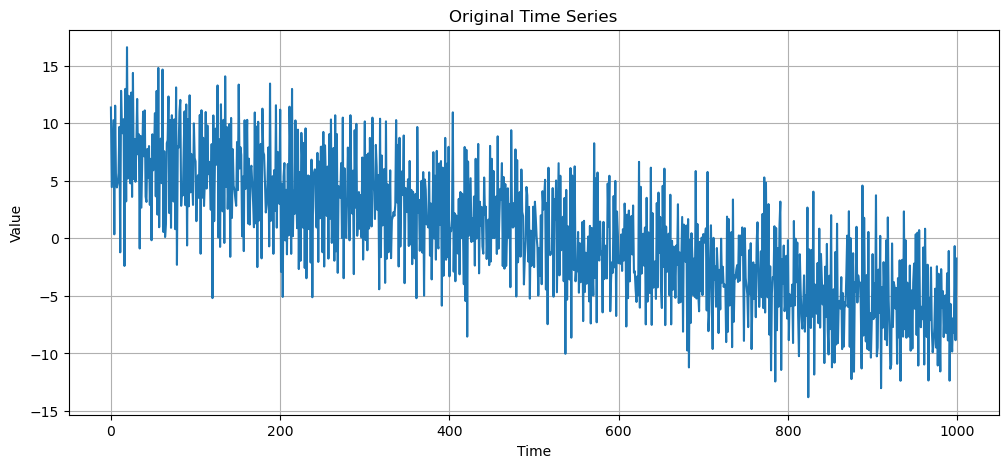

In [63]:
plt.figure(figsize = (12, 5))
plt.plot(ts)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Time Series')
plt.grid()
plt.show()

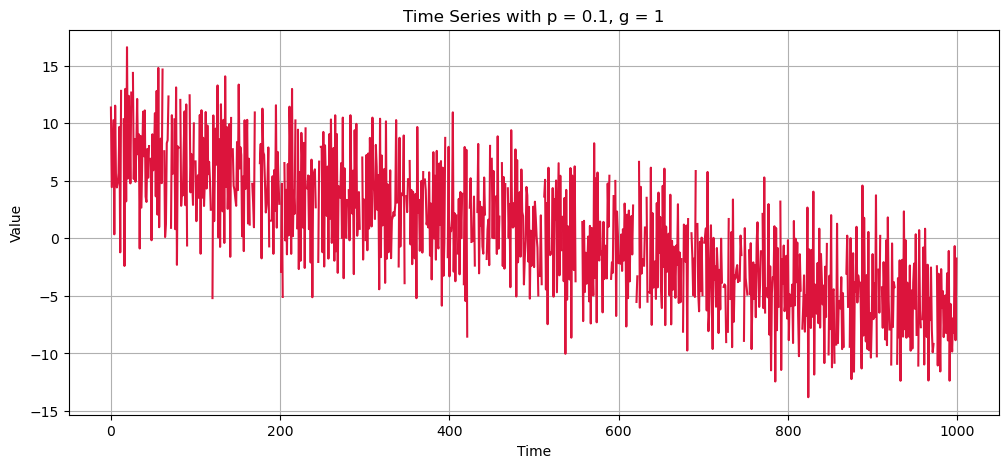

In [64]:
plt.figure(figsize = (12, 5))
plt.plot(ts_missing_1, color = 'crimson')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with p = 0.1, g = 1')
plt.grid()
plt.show()

In [65]:
n = ts.shape[0]

train_prop = 0.6; train_idx = int(train_prop * n)
val_prop = 0.2; val_idx = train_idx + int(val_prop * n)
test_prop = 0.2; test_idx = val_idx + int(test_prop * n)

X_train = ts_missing_1[:train_idx]; Y_train = ts[:train_idx]
X_val = ts_missing_1[train_idx:val_idx]; Y_val = ts[train_idx:val_idx]
X_test = ts_missing_1[val_idx:test_idx]; Y_test = ts[val_idx:test_idx]

In [66]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of validation examples: {X_val.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 600
No. of validation examples: 200
No. of testing examples: 200


In [67]:
X_train.shape

(600, 1)

In [72]:
## Defining the Sequential model
model = Sequential()

model.add(Input(shape = (None, 600, 1), name = 'Input'))
model.add(Conv1D(3, 3, padding = 'same'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, None, 600, 3)      12        
                                                                 
 dense_9 (Dense)             (None, None, 600, 16)     64        
                                                                 
 dense_10 (Dense)            (None, None, 600, 32)     544       
                                                                 
 dense_11 (Dense)            (None, None, 600, 64)     2112      
                                                                 
Total params: 2,732
Trainable params: 2,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
build_and_compile_model <- function(norm) {
  model <- keras_model_sequential() %>%
    norm() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

  model %>% compile(
    loss = 'mean_absolute_error',
    optimizer = optimizer_adam(0.001)
  )

  model
}